In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from solver import Solver

In [2]:
def node_label(node) -> str:
    if node[1].is_conv():
        return f"{node[1].name} = {node[2].upper}"
    else:
        return f"{node[2].lower}≤{node[1].name}≤{node[2].upper}"

def node_color(node, origins, drains):
    # if node in origins:
    #     return "green"
    # elif node in drains:
    #     return "red"
    if node[1].is_conv():
        return "blue"
    elif node[1].is_general:
        return "yellow"
    return "magenta"

In [3]:
sl = Solver("problems/problem_from_article_mod.lp")
graphes = sl.start()
print(sl.result())

ExtendedHighsModel {
	Vars {
		Var(0) [x1] { lb: 0.0, ub: 1.0, integer: True }		Var(1) [z1] { lb: 0.0, ub: inf, integer: True }		Var(2) [z2] { lb: 0.0, ub: inf, integer: True }		Var(3) [x2] { lb: 0.0, ub: 1.0, integer: True }		Var(4) [x3] { lb: 0.0, ub: 1.0, integer: True }		Var(5) [x4] { lb: 0.0, ub: 1.0, integer: True }		Var(6) [z3] { lb: 0.0, ub: inf, integer: True }		Var(7) [x5] { lb: 0.0, ub: 1.0, integer: True }		Var(8) [x6] { lb: 0.0, ub: 1.0, integer: True }		Var(9) [x7] { lb: 0.0, ub: 1.0, integer: True }		Var(10) [z4] { lb: 0.0, ub: inf, integer: True }		Var(11) [z5] { lb: 0.0, ub: inf, integer: True }	}

	Constaints {
		Constraint(0): -inf ≤ 2.0 x1 + 3.0 z1 + 2.0 z2 ≤ 9.0
		Constraint(1): -inf ≤ -1.0 z1 - 2.0 z2 + 9.0 x2 ≤ 0.0
		Constraint(2): -inf ≤ -3.0 x2 + 5.0 x3 - 3.0 x4 ≤ 4.0
		Constraint(3): -inf ≤ -3.0 x2 + 9.0 x4 - 2.0 z3 ≤ 6.0
		Constraint(4): -inf ≤ -1.0 z2 + 2.0 z3 + 9.0 x5 ≤ 8.0
		Constraint(5): -inf ≤ 2.0 z3 - 4.0 x6 - 7.0 x7 ≤ 3.0
		Constraint(6): -inf ≤ -2.0 

In [3]:
graphes

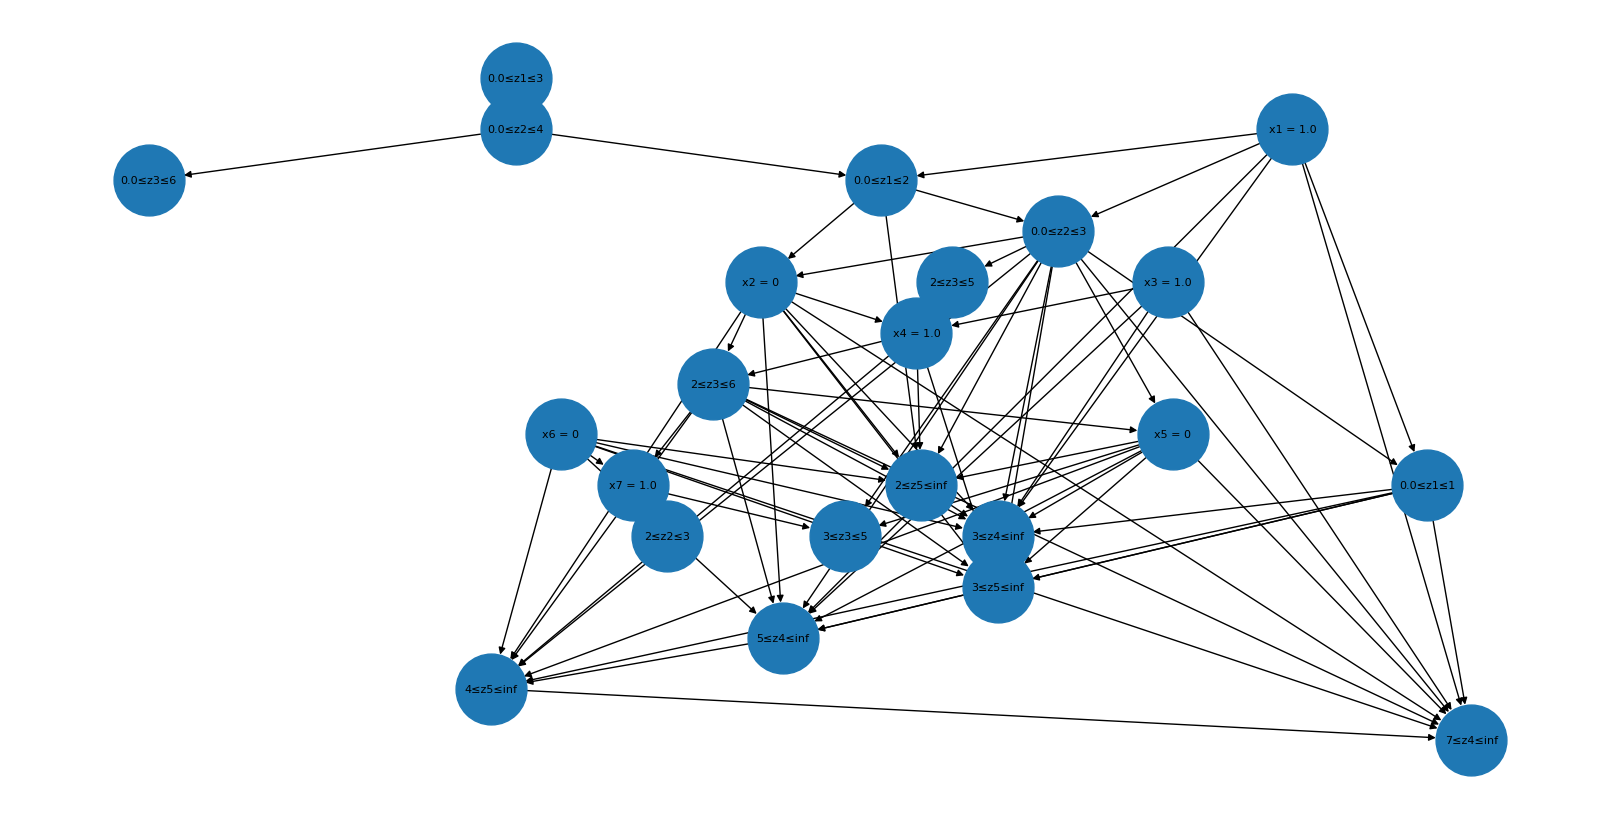

In [4]:
nodes, edges = graphes[0].to_plot_info()

G = nx.DiGraph()
for edge in edges:
    #print(edge)
    G.add_edge(node_label(edge[0]), node_label(edge[1]))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

plt.figure(3,figsize=(16,8)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        #node_color=[node_color(n, origins, drains) for n in nodes]
       )